# 201644004_김산 딥러닝 프로젝트 텐서웨더

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import *

1 Physical GPUs, 1 Logical GPUs


In [71]:
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(int(lst))) / (max(int(lst)) - min(int(lst)))
        normalized.append(normalized_num)
    
    return normalized

In [2]:
path = 'C:\TensorWeather\dustdata.csv'
data = pd.read_csv(path)
#ss_data=StandardScaler().fit_transform(data)
print(data.columns)

Index(['year', 'rainFall', 'finedust'], dtype='object')


In [59]:
inpu = MinMaxScaler().fit_transform(data[['rainFall']])
inpu1 = data[['rainFall']]
oup1 = data[['finedust']]
oup = MinMaxScaler().fit_transform(data[['finedust']])
data1 = MinMaxScaler().fit_transform(data[['rainFall','finedust']])
print(inpu.shape, oup.shape)

(330, 1) (330, 1)


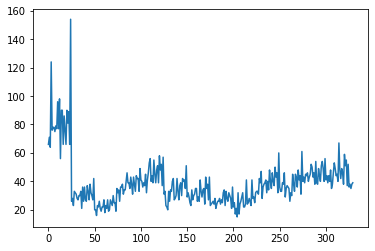

In [45]:
plt.plot(oup1)
plt.show()

In [104]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [87]:
X = tf.keras.layers.Input(shape=[1])
Y = tf.keras.layers.Dense(6,activation='relu')(X)
Y = tf.keras.layers.Dense(6,activation='relu')(Y)
Y = tf.keras.layers.Dense(1,activation='relu')(Y)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse',
    metrics=['accuracy'])
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(inpu, oup, epochs=100, verbose=1)

Epoch 1/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 11/

11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 83/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 84/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 85/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 86/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 87/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 88/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 89/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 90/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 91/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.0030
Epoch 92/100


In [173]:
model.save('C:\TensorWeather\\TW_dust.h')

In [90]:
model = load_model('C:\TensorWeather\\TW_dust.h5')

In [91]:
str(model.predict(inpu[0:11]))

'[[0.1752195 ]\n [0.16710472]\n [0.16710472]\n [0.16710472]\n [0.16710472]\n [0.16710472]\n [0.17839256]\n [0.16710472]\n [0.16710472]\n [0.16710472]\n [0.16710472]]'

In [95]:
oup[0:11]-0.2

array([[0.16690647],
       [0.2028777 ],
       [0.15251799],
       [0.58417266],
       [0.23884892],
       [0.25323741],
       [0.25323741],
       [0.23165468],
       [0.26043165],
       [0.24604317],
       [0.38273381]])

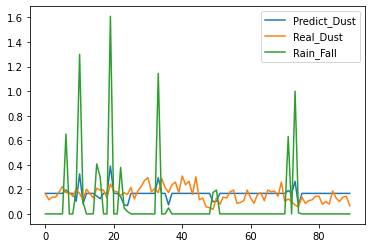

In [115]:
plt.plot(model.predict(inpu[80:170]*10000), label="Predict_Dust")
plt.plot(oup[80:170], label="Real_Dust")
plt.plot(inpu[80:170]*3, label="Rain_Fall")
plt.legend()
plt.show()

In [84]:
print(model.get_weights())

[array([[ 0.2875131 ,  0.533105  , -0.49468896,  0.13746156,  0.25452316,
         0.49848858]], dtype=float32), array([ 0.05944607,  0.06329993,  0.        ,  0.05122615, -0.01003617,
       -0.01930177], dtype=float32), array([[ 0.23962152, -0.19686833, -0.61210316, -0.23901746, -0.13322383,
         0.2952562 ],
       [ 0.47360748,  0.1769037 ,  0.13528334, -0.64078027,  0.05142993,
        -0.5016694 ],
       [-0.25095716,  0.01578957,  0.5429422 , -0.54688925,  0.04613882,
        -0.10775805],
       [ 0.07968626, -0.07361615,  0.6017899 , -0.48428887, -0.30531883,
        -0.41129357],
       [-0.20671473, -0.26784497,  0.07905096, -0.41368413, -0.66606414,
        -0.6632366 ],
       [-0.64076877,  0.3829591 , -0.16211344, -0.45653448, -0.05892569,
        -0.40484154]], dtype=float32), array([ 0.0637783 ,  0.01009215, -0.00612188,  0.        ,  0.        ,
        0.        ], dtype=float32), array([[ 0.9214318 ],
       [ 0.00134394],
       [-0.47418135],
       [ 0.82261